In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=load_breast_cancer()


In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [9]:
cancer_data=pd.DataFrame(data.data)

In [10]:
cancer_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
cancer_target=pd.DataFrame(data.target)

In [12]:
cancer_target

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [13]:
x=cancer_data
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
y=data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [15]:
x.shape

(569, 30)

In [16]:
y.shape

(569,)

In [17]:
y=y.reshape(-1,1)

In [18]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=47)

In [19]:
train_x.shape

(443, 30)

In [20]:
test_x.shape

(126, 30)

In [21]:
train_y.shape

(443, 1)

In [22]:
test_y.shape

(126, 1)

In [23]:
lg=LogisticRegression()


In [24]:
lg.fit(train_x,train_y)

LogisticRegression()

In [25]:
pred=lg.predict(test_x)
print(pred)

[1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0
 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0
 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0]


In [26]:
print('accuracy_score:',accuracy_score(test_y,pred))

accuracy_score: 0.9523809523809523


In [27]:
print(confusion_matrix(test_y,pred))

[[48  2]
 [ 4 72]]


In [28]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        50
           1       0.97      0.95      0.96        76

    accuracy                           0.95       126
   macro avg       0.95      0.95      0.95       126
weighted avg       0.95      0.95      0.95       126



Training the model with Naive Bayes Classifier Two Type--GaussianNB(binary) and MultinomialNB(more than two target)

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)


GaussianNB()

In [31]:
predgnb=gnb.predict(test_x)
print(accuracy_score(predgnb,test_y))

0.9285714285714286


In [32]:
print(confusion_matrix(predgnb,test_y))
print(classification_report(predgnb,test_y))

[[45  4]
 [ 5 72]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.95      0.94      0.94        77

    accuracy                           0.93       126
   macro avg       0.92      0.93      0.93       126
weighted avg       0.93      0.93      0.93       126



In [33]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)

SVC()

In [34]:
predsvc=svc.predict(test_x)
print('actual and predicted value score',accuracy_score(test_y,predsvc))

actual and predicted value score 0.9047619047619048


In [35]:
print(confusion_matrix(predsvc,test_y))
print(classification_report(predsvc,test_y))

[[41  3]
 [ 9 73]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        44
           1       0.96      0.89      0.92        82

    accuracy                           0.90       126
   macro avg       0.89      0.91      0.90       126
weighted avg       0.91      0.90      0.91       126



In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)
predknn=knn.predict(test_x)

In [38]:
predknn

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [39]:
print(confusion_matrix(test_y,predknn))

[[46  4]
 [ 5 71]]


In [40]:
print(classification_report(test_y,predknn))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        50
           1       0.95      0.93      0.94        76

    accuracy                           0.93       126
   macro avg       0.92      0.93      0.93       126
weighted avg       0.93      0.93      0.93       126



In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dct=DecisionTreeClassifier()
dct.fit(train_x,train_y)
preddct=dct.predict(test_x)

print(confusion_matrix(preddct,test_y))
print(classification_report(preddct,test_y))

[[45  6]
 [ 5 70]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        51
           1       0.92      0.93      0.93        75

    accuracy                           0.91       126
   macro avg       0.91      0.91      0.91       126
weighted avg       0.91      0.91      0.91       126



# AUC ROC Curve

Area under the curve=Reicever operating characteristics

In [43]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [44]:
y_pred_prob=lg.predict_proba(test_x)[:,1]


In [45]:
y_pred_prob

array([9.97463103e-01, 5.85625118e-06, 2.05804319e-09, 9.96944771e-01,
       9.89617767e-01, 9.63468063e-01, 4.25834439e-04, 8.65853893e-03,
       5.15706391e-07, 5.62057637e-01, 9.96038477e-01, 1.06352061e-03,
       8.95629855e-01, 1.00287900e-01, 9.81512461e-01, 8.27237486e-01,
       9.15285687e-05, 4.48959261e-07, 9.99895352e-01, 9.99878172e-01,
       8.92811677e-01, 2.21975746e-11, 3.72933040e-01, 8.85949076e-01,
       9.94607329e-01, 9.99791166e-01, 9.31757558e-01, 9.96912237e-01,
       9.97785148e-01, 7.28310637e-02, 3.96760145e-02, 9.94935771e-01,
       9.42379802e-01, 5.96238897e-22, 9.97336269e-01, 3.40425957e-01,
       7.10686703e-05, 6.43642301e-01, 3.15293983e-08, 6.69069920e-10,
       9.99080071e-01, 4.13410212e-10, 9.99915462e-01, 9.93460522e-01,
       9.98917002e-01, 9.56895394e-01, 1.58701063e-05, 6.25092638e-03,
       9.99574925e-01, 9.95514505e-01, 9.99696107e-01, 1.04784157e-02,
       9.99830395e-01, 9.86850024e-01, 7.21322875e-01, 8.49598099e-01,
      

In [46]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [47]:
fpr

array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.1 , 0.1 , 0.3 , 0.3 ,
       1.  ])

In [48]:
tpr

array([0.        , 0.01315789, 0.68421053, 0.68421053, 0.85526316,
       0.85526316, 0.94736842, 0.94736842, 0.98684211, 0.98684211,
       1.        , 1.        ])

In [49]:
thresholds

array([1.99996475e+00, 9.99964753e-01, 9.53938019e-01, 9.42379802e-01,
       8.27237486e-01, 8.22673916e-01, 5.62057637e-01, 1.06678682e-01,
       6.54813493e-02, 4.90842976e-03, 4.29112640e-03, 5.96238897e-22])

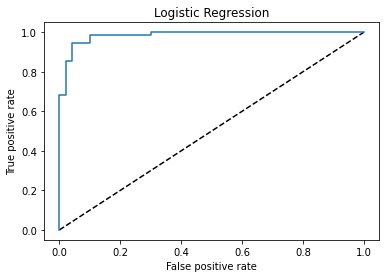

In [50]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [51]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))

In [52]:
auc_score

0.9536842105263157

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)
p=dt.predict(test_x)
print(accuracy_score(test_y,p))

0.9285714285714286


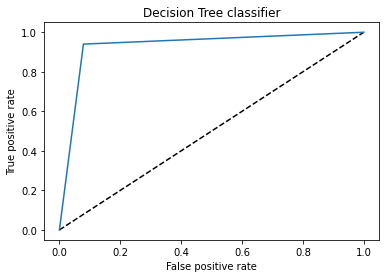

0.9305263157894736

In [55]:
#Decision Tree Curve
y_pred_prob=dt.predict_proba(test_x)[:,0]
tpr,fpr,thresholds=roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree classifier')
plt.show()
auc_score=roc_auc_score(test_y,dt.predict(test_x))
auc_score

Testing various models in one function

In [57]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(test_y,predm))
    print(confusion_matrix(test_y,predm))
    print(classification_report(test_y,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.9523809523809523
[[48  2]
 [ 4 72]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        50
           1       0.97      0.95      0.96        76

    accuracy                           0.95       126
   macro avg       0.95      0.95      0.95       126
weighted avg       0.95      0.95      0.95       126



Accuracy score of GaussianNB() is:
0.9285714285714286
[[45  5]
 [ 4 72]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        50
           1       0.94      0.95      0.94        76

    accuracy                           0.93       126
   macro avg       0.93      0.92      0.93       126
weighted avg       0.93      0.93      0.93       126



Accuracy score of SVC() is:
0.9047619047619048
[[41  9]
 [ 3 73]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        50
           1 